[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module1_Files/1_Boston_EDA.ipynb)

# Boston Housing: EDA
------------------------
**Dr. Dave Wanik**

## Import modules, mount your Google Drive, read data
Set up your environment

In [ ]:
# requirements_module1 = "https://raw.githubusercontent.com/drdave-teaching/Files/refs/heads/main/OPIM5509_requirements/requirements_module1.txt"
# !pip install -r $requirements_module1

In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting

In [ ]:
# # mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # read data
# # on the lefthand side, navigate to your data and copy the path
# df = pd.read_csv('/content/drive/My Drive/OPIM 5509/Module 1: Python Bootcamp/Data/BostonHousing.csv')

In [ ]:
# read from shareable link
# https://drive.google.com/file/d/1ftXw37thrjI7NwPuDvm_HsOtNiSAOL1z/view?usp=sharing
# !gdown 1ftXw37thrjI7NwPuDvm_HsOtNiSAOL1z
# df = pd.read_csv('BostonHousing.csv')

# Link to the CSV file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module1_Files/BostonHousing.csv"

# Read the data into a DataFrame
df = pd.read_csv(url)

## Head, shape, column names, data types, missing values
See what you're working with - any missing values? Wrong data types? Strange values?

If there are missing values, you can a) delete or b) impute (constant value like 0 or -999, mean or median of column, forward fill, backfill, interpolate, etc.)

In [ ]:
# head
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# shape
df.shape

(506, 14)

In [ ]:
# column names
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# data types
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [ ]:
# try .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# missing values in entire dataframe
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum().sum()

0

In [ ]:
# missing values by column
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


## Statistics, percentiles
Get some more granularity on numeric columns. Any strange values? Any 'logical' variables hiding as numerics?

In [ ]:
# describe() gives summary statistics
df.describe()

# it looks like 'chas' is hiding as a float, we will ignore that for now (min=0, max=1)
# 'chas' is a logical/indicator/binary/flag/dummy variable for "Near Charles River"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# calculate more detailed percentiles or stats on your own
# let's focus on the target variable 'medv'

# mean
print("This is the mean: ")
df['medv'].mean() # in this case we are using the mean() function from pandas, but we don't need to say pd.df['medv'].mean(),
                  # since it is already a dataframe, you can use ALL the pandas functionality

This is the mean: 


22.532806324110677

In [ ]:
# mean rounded to two decimal points
print("This is the mean rounded to two decimal points: ")
np.round(df['medv'].mean(),2) # we can use a round() function, just like in Excel

This is the mean rounded to two decimal points: 


22.53

In [ ]:
# median
print("This is the median: ") # print statements don't matter, but they make the output look nice
df['medv'].median() # this is the median function from pandas, but we don't say pd.df['medv'].median(),
                    # because it is already a dataframe, so you can use ALL of the pandas functionality

This is the median: 


21.2

In [ ]:
# mode
# sometimes in a numeric column, there might not be an interesting mode
print("This is the mode:")
df['medv'].mode() # 50 is the mode! Interesting... will be interesting to visualize what this distribution looks like

This is the mode:


,medv
0,50.0


In [ ]:
# percentiles
# link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
print("Here is the 10th percentile, which means 10% of the data lies below this value:")
df['medv'].quantile(0.1)

Here is the 10th percentile, which means 10% of the data lies below this value:


12.75

In [ ]:
# let's look at the 10, 25, 50, 75, 90 percentiles
print("Here is the 10th (90th) percentiles, which means 10% (90%) of the data lies below this value:")
df['medv'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# notice how we entered the values as a list inside the function (square brackets [])
# check your work! scroll back up to describe and look at if the values line up (like 25, 50 and 75)

Here is the 10th (90th) percentiles, which means 10% (90%) of the data lies below this value:


,medv
0.10,12.750
0.25,17.025
0.50,21.200
0.75,25.000
0.90,34.800


## Flag variables
Convert some variables to 0 or 1 to help subset, explore trends

In [ ]:
# make a new column to recode the target variable 'medv' to a 0 or 1
# 0 if less than or equal to the mean
# 1 if greater than the mean

# one line of code! we made a new column and populated it
df['FLAG_medv'] = np.where(df['medv'] <= np.mean(df['medv']), 0, 1)

# check your work!
print('The mean of medv is:', df['medv'].mean())
df.head()

The mean of medv is: 22.532806324110677


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


## Subsetting rows and columns
Sometimes data has extra columns you're not interested in... drop them! Other times you may want to focus on just a subset of data.

In [ ]:
# subset all rows where FLAG_medv = 0, we'll call this 'lowData'
lowData = df[df['FLAG_medv'] == 0]
print(lowData.shape) # make sure you got something... at least some rows... not empty...
                      # if you want to print two things in one cell, the first needs a print statement

lowData.head() # check your work

(297, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,0


In [ ]:
# subset all rows where FLAG_medv = 0, we'll call this 'lowData'
# copy and paste the text above and reuse
highData = df[df['FLAG_medv'] == 1]
print(highData.shape) # make sure you got something... at least some rows... not empty...
                      # if you want to print two things in one cell, the first needs a print statement

highData.head() # check your work

(209, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [ ]:
# do the number of rows in lowData and highData equal the original rows?
tmpRows = lowData.shape[0] + highData.shape[0]

In [ ]:
# a logical statement
tmpRows == df.shape[0] # TRUE! it worked

True

## Group By (pivot tables)
Count, min, max, mean, standard deviation

In [ ]:
# link: https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
df.groupby('FLAG_medv').describe() #ONE LINE OF CODE! Too easy.

# now we can compare the attributes of all the numeric variables
# recall that describe() is only useful for numeric variables

crim                                                          \
           count      mean        std      min     25%      50%      75%   
FLAG_medv                                                                  
0          297.0  5.563153  10.668584  0.01096  0.1396  0.84054  7.67202   
1          209.0  0.842998   2.125546  0.00632  0.0536  0.10469  0.46296   

                       zn             ...  lstat          medv             \
               max  count       mean  ...    75%    max  count       mean   
FLAG_medv                             ...                                   
0          88.9762  297.0   4.587542  ...  19.88  37.97  297.0  16.870370   
1          14.4383  209.0  20.992823  ...   9.16  29.55  209.0  30.579426   

                                                   
                std   min   25%   50%   75%   max  
FLAG_medv                                          
0          4.233162   5.0  13.9  18.0  20.3  22.5  
1          8.308060  22.6  24.0  27.9  34.6  50.0  

[2 rows x 112 columns]

## Correlation Matrix
Explore the relationship between numeric variables

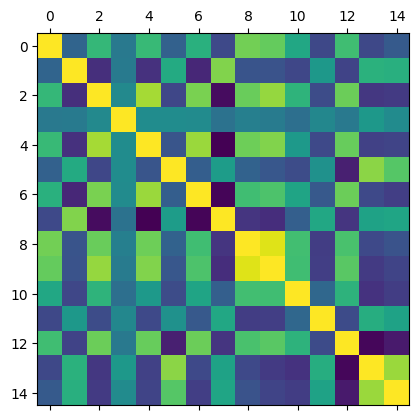

In [ ]:
# link: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
plt.matshow(df.corr())
plt.show()

# this is OK... but there's no legend and no interesting labels...
# keep scrolling the article and you will find the sns plot (seaborn)

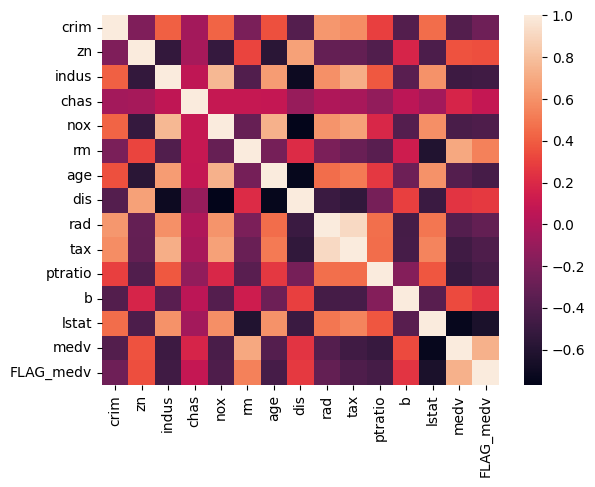

In [ ]:
# pretty! we haven't used seaborn yet, but it is certainly a nice library
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# notice perfect correlation along the diagonal (as expected)
# it's most interesting to look at correlation among predictors, and with the target

## Univariate Plots
Boxplots, kernel density plots, histograms

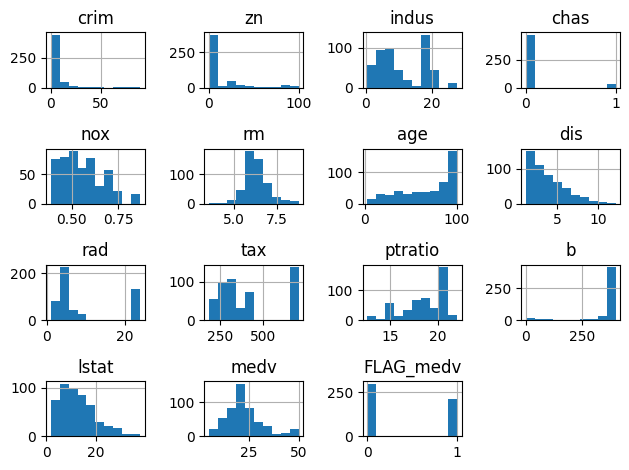

In [ ]:
# show histograms of ALL variables
# histograms allow you to see the shape of the distribution... binned data...
df.hist() # this makes the histogram plot
plt.tight_layout() # space stuff out nicely (what happens without this?)
plt.show()

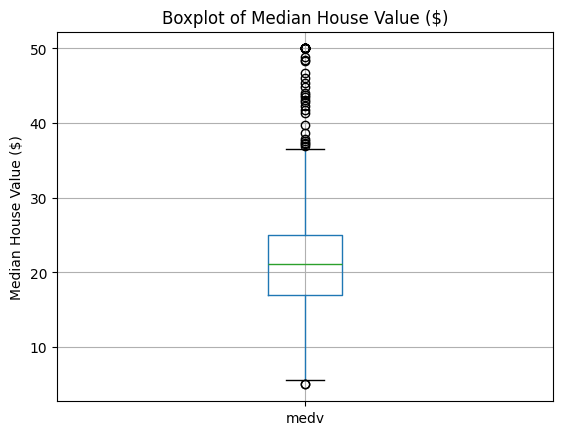

In [ ]:
# boxplots
df.boxplot('medv') # grab the dataframe then select the 'medv' column
plt.ylabel('Median House Value ($)')
plt.title("Boxplot of Median House Value ($)")
plt.show()

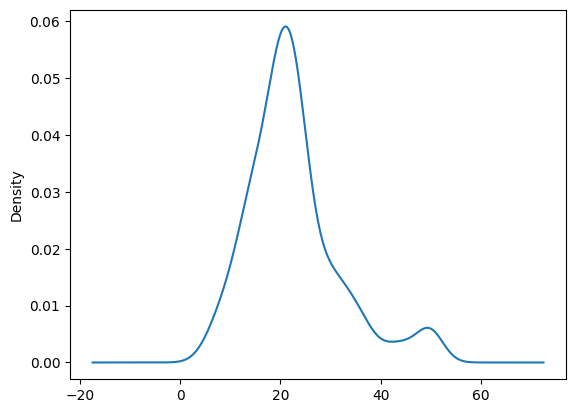

In [ ]:
df['medv'].plot.density() # notice the difference in syntax! where does medv go?
plt.show()                # grab the column of interest then make a plot

## Bivariate Plots
Scatterplots

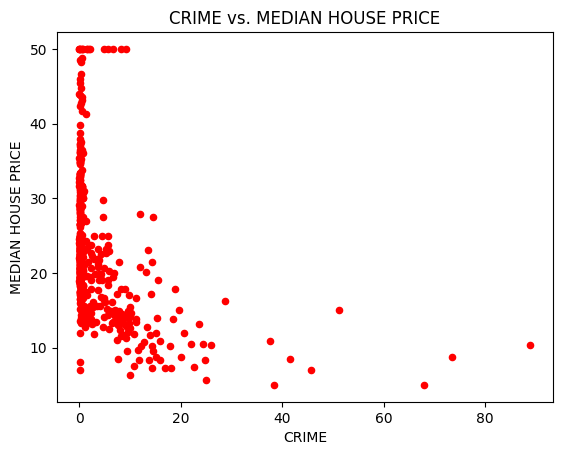

In [ ]:
# here's an easy plot of x = crim and y = medv
df.plot.scatter(x='crim', y='medv', color='red') # notice you just need the names of the columns
plt.xlabel("CRIME")
plt.ylabel("MEDIAN HOUSE PRICE")
plt.title("CRIME vs. MEDIAN HOUSE PRICE")
plt.show()

# every plot you make should have sensible labels and titles! NO EXCUSE!

# you can get fancy and add a smoother...
# link: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

In [ ]:
# advanced - make two scatterplots side by side, these are known as subplots
# link: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

## Pandas profiler
(Optional). Use this for a quick, automated check of the data... coding your own is best, but this is good for a quick check if you're tight for time.

In [ ]:
# link: https://stackoverflow.com/questions/53085501/how-to-upgrade-pandas-on-google-colab
# you may need to update pandas

In [ ]:
# import pkg_resources
# import types
# def get_imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             # Split ensures you get root package,
#             # not just imported function
#             name = val.__name__.split(".")[0]

#         elif isinstance(val, type):
#             name = val.__module__.split(".")[0]

#         # Some packages are weird and have different
#         # imported names vs. system/pip names. Unfortunately,
#         # there is no systematic way to get pip names from
#         # a package's imported name. You'll have to add
#         # exceptions to this list manually!
#         poorly_named_packages = {
#             "PIL": "Pillow",
#             "sklearn": "scikit-learn"
#         }
#         if name in poorly_named_packages.keys():
#             name = poorly_named_packages[name]

#         yield name
# imports = list(set(get_imports()))

# # The only way I found to get the version of the root package
# # from only the name of the package is to cross-check the names
# # of installed packages vs. imported packages
# requirements = []
# for m in pkg_resources.working_set:
#     if m.project_name in imports and m.project_name!="pip":
#         requirements.append((m.project_name, m.version))

# for r in requirements:
#     print("{}=={}".format(*r))

# # Save to requirements.txt
# with open("requirements.txt", "w") as file:
#     for n in requirements:
#         file.write("{}=={}\n".format(*n))

# print("requirements.txt has been created in the current directory!")